# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

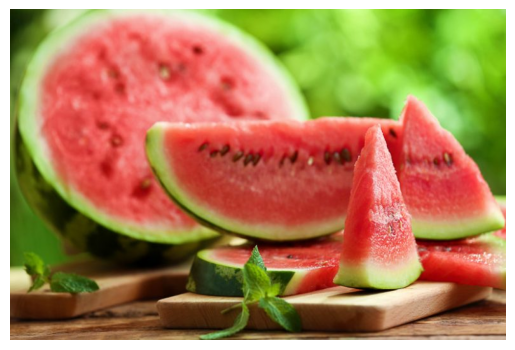

In [2]:
### START CODE HERE ###
# img = cv2.imread('images/test.png')
img = cv2.imread('images/watermelon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [3]:
### START CODE HERE ###
def plot_histogram(image):
    # Split the image into channels
    channels = cv2.split(image)
    
    # Define histogram parameters
    hist_size = [256]  # Number of bins (one for each intensity level)
    ranges = [0, 256]  # Range of pixel intensities (0 to 255)

    # Calculate the histogram for each color channel
    hist = []
    for channel in channels:
        hist.append(cv2.calcHist([channel], [0], None, hist_size, ranges))
    
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

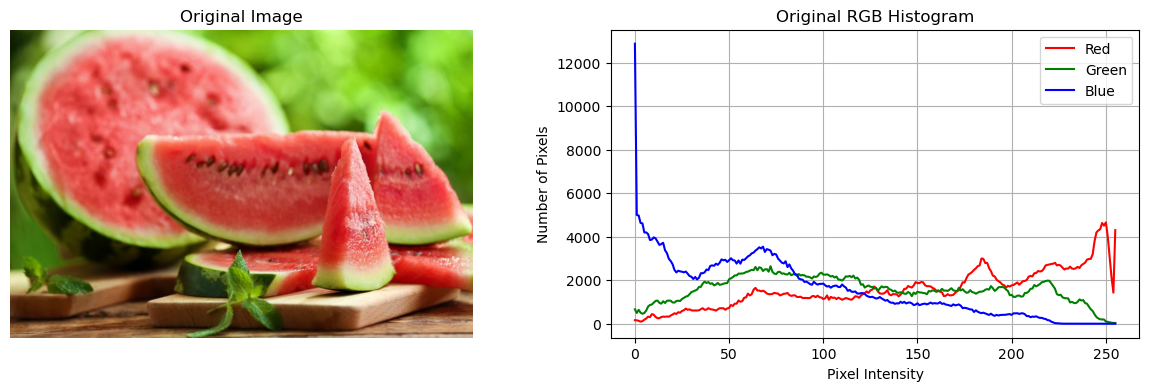

In [4]:
### START CODE HERE ###

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')

hist = plot_histogram(img)
# Plot the histograms
axs[1].set_title("Original RGB Histogram")
axs[1].plot(hist[0], color='r', label='Red')
axs[1].plot(hist[1], color='g', label='Green')
axs[1].plot(hist[2], color='b', label='Blue')
axs[1].set_xlabel("Pixel Intensity")
# axs[1].set_xlim([0, 255])  # Set x-axis range to match the histogram bins
# axs[1].set_xticks(range(0, 256, 50))  # Set x-axis ticks every 50 units
axs[1].set_ylabel("Number of Pixels")
axs[1].grid(True)
axs[1].legend()
plt.show()

### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

In [5]:
# def equalize_histogram(image):
#   # Split the image into channels
#   channels = cv2.split(image)

#   # Equalize histogram for each channel
#   equalized_channels = []
#   for channel in channels:
#     equalized_channels.append(cv2.equalizeHist(channel))

#   # Define histogram parameters
#   hist_size = [256]  # Number of bins (one for each intensity level)
#   ranges = [0, 256]  # Range of pixel intensities (0 to 255)

#   # Calculate histogram for each equalized channel
#   hist = []
#   for channel in equalized_channels:
#     hist.append(cv2.calcHist([channel], [0], None, hist_size, ranges))
#   return hist

In [6]:
def equalize_image(image):
  """
  Equalizes the histogram of an image for each channel (BGR format).

  Args:
      image: The image to be equalized (BGR format).

  Returns:
      numpy.ndarray: The image with equalized histogram (BGR format).
  """

  # Split the image into channels
  channels = cv2.split(image)

  # Equalize histogram for each channel
  equalized_channels = []
  for channel in channels:
      equalized_channels.append(cv2.equalizeHist(channel))

  # Merge equalized channels back into BGR image
  image_eq = cv2.merge(equalized_channels)

  return image_eq

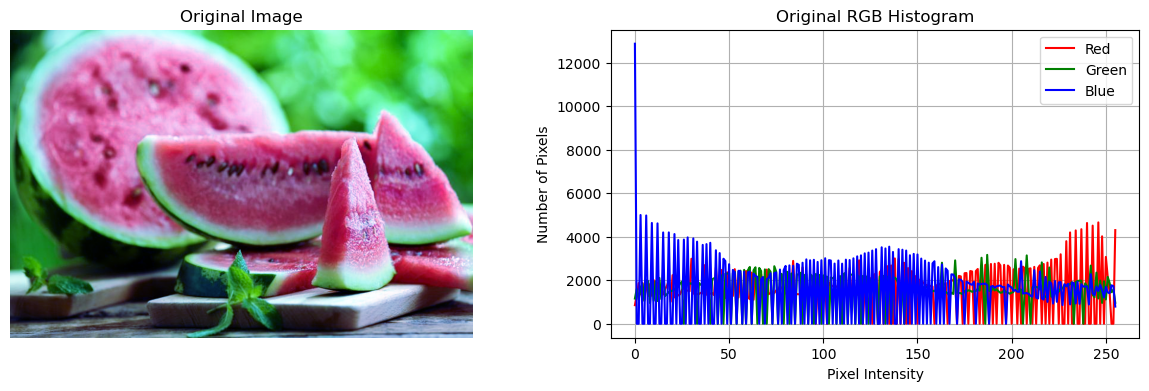

In [7]:
### START CODE HERE ###
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

equalized_image = equalize_image(img)

axs[0].imshow(equalized_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

hist = plot_histogram(equalized_image)
# Plot the histograms
axs[1].set_title("Original RGB Histogram")
axs[1].plot(hist[0], color='r', label='Red')
axs[1].plot(hist[1], color='g', label='Green')
axs[1].plot(hist[2], color='b', label='Blue')
axs[1].set_xlabel("Pixel Intensity")
# axs[1].set_xlim([0, 255])  # Set x-axis range to match the histogram bins
# axs[1].set_xticks(range(0, 256, 50))  # Set x-axis ticks every 50 units
axs[1].set_ylabel("Number of Pixels")
axs[1].grid(True)
axs[1].legend()
plt.show()
 
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

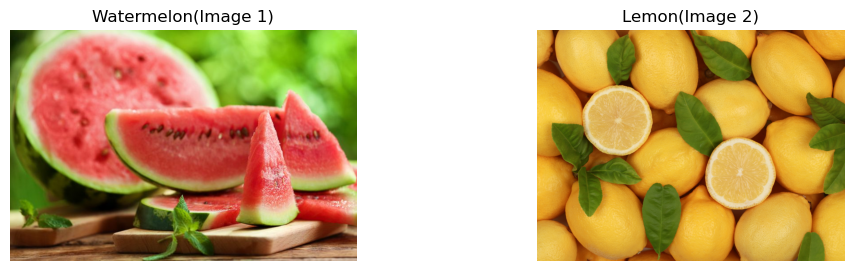

In [8]:
### START CODE HERE ###
# img1 = cv2.imread('images/test.png')
# img2 = cv2.imread('images/test2.png')
img1 = cv2.imread('images/watermelon.jpg')
img2 = cv2.imread('images/lemon.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

axs[0].imshow(img1)
axs[0].set_title('Watermelon(Image 1)')
axs[0].axis('off')


axs[1].imshow(img2)
axs[1].set_title('Lemon(Image 2)')
axs[1].axis('off')
plt.show()
### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

In [9]:
def compute_pdf_cdf(hist):
    pdf, cdf = [],[]
    for channel in range(len(hist)):
        pdf.append(hist[channel] / np.sum(hist[channel]))
        cdf.append(np.cumsum(pdf[channel]))
    return pdf, cdf

In [10]:
def plot_image_pdf_cdf(image, title_name):

    # Compute PDF and CDF
    hist = plot_histogram(image)
    pdf_img, cdf_img = compute_pdf_cdf(hist)
    
    # Create figure and subplots
    fig, axs = plt.subplots(1, 3, figsize=(13, 4))

    # Plot Image
    axs[0].imshow(image)
    axs[0].set_title(f'{title_name}')
    axs[0].axis('off')
    
    # Plot PDFs
    axs[1].plot(pdf_img[0], color='r', label='Red')
    axs[1].plot(pdf_img[1], color='g', label='Green')
    axs[1].plot(pdf_img[2], color='b', label='Blue')
    axs[1].set_title('PDF')
    axs[1].set_xlabel("Pixel Intensity")
    axs[1].set_ylabel("Probability Density")
    axs[1].grid(True)
    axs[1].legend()
    
    # Plot CDFs
    axs[2].plot(cdf_img[0], color='r', label='Red')
    axs[2].plot(cdf_img[1], color='g', label='Green')
    axs[2].plot(cdf_img[2], color='b', label='Blue')
    axs[2].set_title('CDF')
    axs[2].set_xlabel("Pixel Intensity")
    axs[2].set_ylabel("Cumulative Probability")
    axs[2].grid(True)
    axs[2].legend()
    
    plt.tight_layout(pad=2.0)  
    # Display the plot
    plt.show()

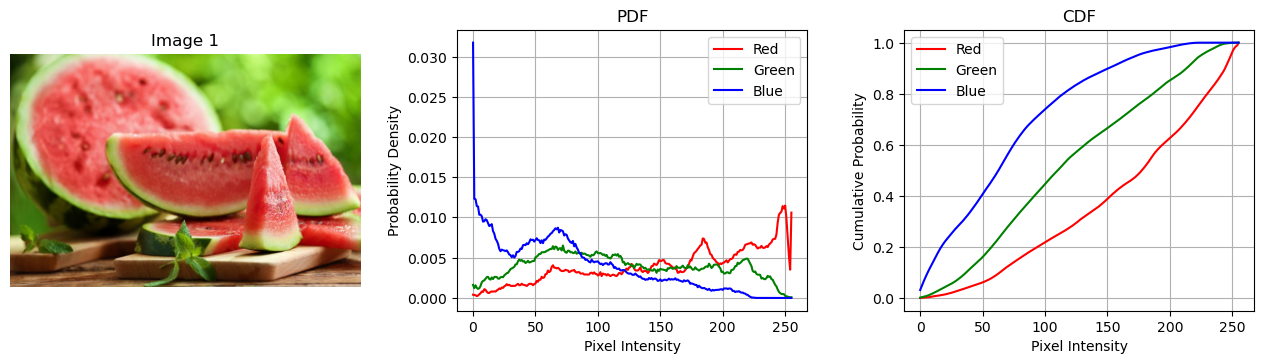

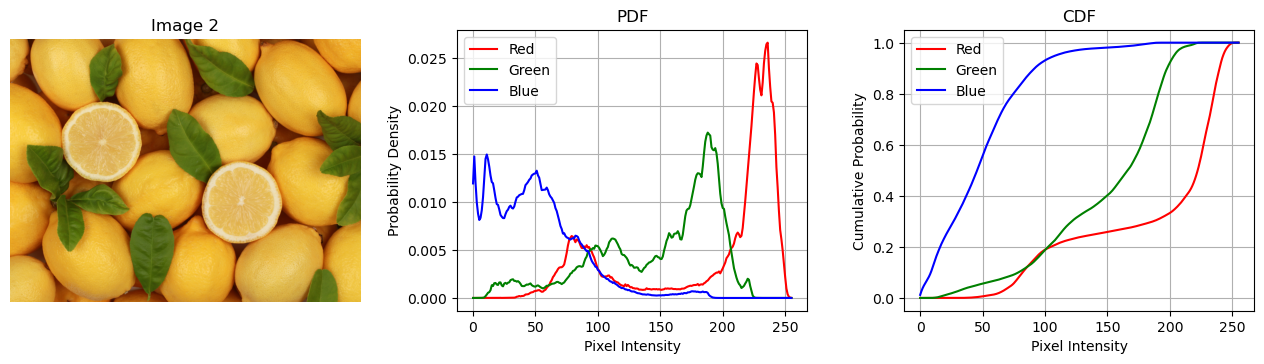

In [11]:
image_paths = [img1, img2]

for i, img in enumerate(image_paths):
    plot_image_pdf_cdf(img, f"Image {i+1}")

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

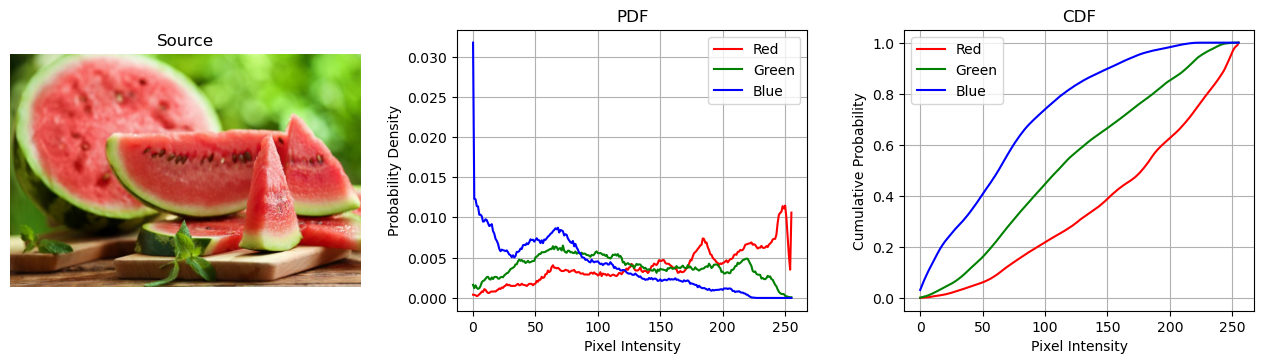

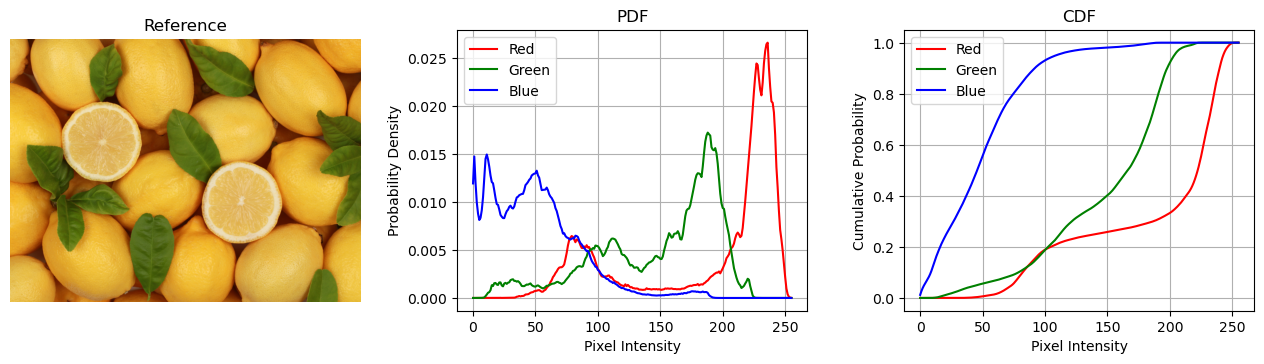

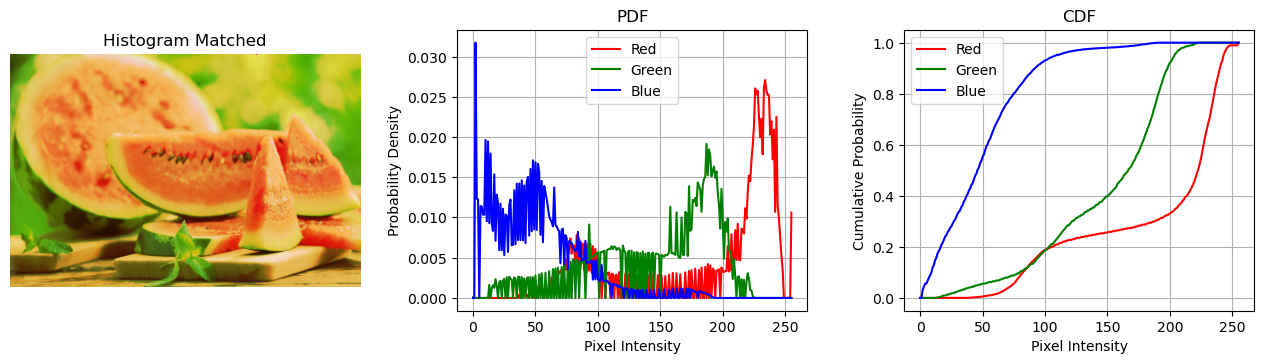

In [18]:
### START CODE HERE ###
'''
ใช้ libary

from skimage.exposure import match_histograms

matched = match_histograms(img1, img2, channel_axis=-1)

plot_image_pdf_cdf(img1, "Source")
plot_image_pdf_cdf(img2, "Reference")
plot_image_pdf_cdf(matched, "Histogram Matched")
'''

def histogram_match_using_lookup(img1, img2):
    # Calculate histograms
    hist_img1 = plot_histogram(img1)
    hist_img2 = plot_histogram(img2)
    
    # Compute PDFs and CDFs
    pdf_img1, cdf_img1 = compute_pdf_cdf(hist_img1)
    pdf_img2, cdf_img2 = compute_pdf_cdf(hist_img2)

    channels = cv2.split(img1)
    
    # Create lookup table
    lookup_table = []
    for channel in range(len(channels)):
        lookup_channel = np.zeros(256, dtype=np.uint8)
        for i in range(256):
            lookup_channel[i] = np.argmax(cdf_img2[channel] >= cdf_img1[channel][i])
        lookup_table.append(lookup_channel)
    
    # Apply lookup table to image
    matched_img = np.zeros_like(img1)
    for channel in range(len(channels)):
        matched_img[:,:,channel] = lookup_table[channel][img1[:,:,channel]]
    
    return matched_img

matched_img = histogram_match_using_lookup(img1, img2)

plot_image_pdf_cdf(img1, "Source")
plot_image_pdf_cdf(img2, "Reference")
plot_image_pdf_cdf(matched_img, "Histogram Matched")

### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

## **Answers**
1. มีจำนวนมากของพิกเซลในภาพที่มีค่าความสว่างสูงหรือสีขาวมากๆ 
    - ภาพจะดูซีดจาง หรือขาดคอนทราสต์ ไฮไลท์และรายละเอียดในบริเวณที่สว่างกว่าอาจสูญหายไป
    - สีอาจดูอิ่มตัวน้อยลง หรือซีดจาง
    - เงาและบริเวณที่มืดกว่าอาจมีรายละเอียดน้อยลง หรือดูดำสนิท<br/>
    
    Histogram  (histogram คือ กราฟที่แสดงการกระจายของความเข้มข้นของพิกเซลในภาพ)<br/>
    - ความเข้มข้นสูงสอดคล้องกับบริเวณที่สว่างกว่าในภาพ ในขณะที่ความเข้มข้นต่ำแสดงถึงบริเวณที่มืดกว่า
    - หากฮิสโตแกรมกระจุกตัวอยู่ที่ปลายความเข้มข้นสูง (ด้านขวา) หมายความว่าพิกเซลส่วนใหญ่ในภาพมีค่าสูง บ่งบอกถึงภาพโดยรวมที่สว่าง<br/>
    <br/>
2. histogram of the template image ควรจะมีการ Balanced Distribution: การกระจายของความเข้มข้นพิกเซลกระจายเกือบทั่วทั้งช่วง (จากความเข้มข้นต่ำถึงสูง) เพื่อเป็นการ<br/>
    - Improved Contrast: โดยการจับคู่ฮิสโตแกรมของภาพสว่างของคุณกับฮิสโตแกรมที่กระจายอย่างดี จะกระจายความเข้มข้นของพิกเซลใหม่ ซึ่งสามารถช่วยกู้คืนรายละเอียดในไฮไลท์ (ที่เปิดรับแสงมากเกินไป) และอาจปรับปรุงคอนทราสต์โดยรวมในภาพ
    - Reduced Washout: ฮิสโตแกรมเป้าหมายที่สมดุล จะช่วยลดความสว่างโดยรวมในภาพที่คุณกำลังปรับปรุง ลดการกระจุกตัวที่ความเข้มข้นสูงของกราฟได้
    - Color Restoration (ถ้ามี): หากภาพต้นฉบับมีสีสันสดใสที่ถูกชะล้างออกไป เนื่องจากการเปิดรับแสงมากเกินไป ฮิสโตแกรมเป้าหมายที่มีการกระจายของสี จะทำให้ช่วยคืนค่าความสดใสของสีบางส่วนระหว่างการจับคู่<br/>
    เช่น:<br/>
    Source Image: ภาพถ่ายทิวทัศน์ที่มีแสงสว่างเพียงพอ โดยมีการกระจายของท้องฟ้า พื้นดิน และเงาอย่างสมดุลในฮิสโตแกรม<br/>
    Template: ภาพถ่ายบุคคลที่มีความสมดุลระหว่างไฮไลท์และเงา แสดงรายละเอียดในทั้งบริเวณสว่างและมืด<br/>
    <br/>

3. <b>Adaptive equalizer</b><br/>
    - Adaptive Equalizer จะแบ่งภาพออกเป็นส่วนย่อยๆ (local regions) หลายๆ ส่วน
    - สำหรับแต่ละส่วนย่อย จะมีการคำนวณ Histogram เพื่อดูการกระจายของค่าความสว่างของพิกเซลในบริเวณนั้น
    - จากนั้นจะทำการปรับค่าความสว่างและความคมชัดของแต่ละส่วนย่อย โดยพิจารณาจาก Histogram ที่ได้มา ทำให้ภาพในแต่ละส่วนย่อยมีความสว่างและความคมชัดที่เหมาะสมกับลักษณะของภาพในบริเวณนั้นๆ<br/>
    
    <b>Dynamic Range Adjustment:</b><br/>
    - Histogram Equalization: เพื่อกระจายค่าความสว่างของภาพใหม่ วิธีนี้ช่วยในการเพิ่มความคมชัดและมองเห็นรายละเอียดทั่วทั้งภาพโดยเฉพาะเฉพาะส่วนที่มีแสงอ่อนๆ<br/>

    <b>Selective Editing:</b>
    - Selective Brightness and Contrast Adjustment: ใช้เครื่องมือแก้ไขแบบเลือกเพื่อปรับความสว่างและความคมชัดในพื้นที่ที่ต้องการของภาพ
    - Dodging and Burning: ปรับใช้เทคนิคการ Dodging (การทำให้แสงสว่างขึ้น) และ Burning (การทำให้มืดลง) โดยการใช้เครื่องมือในซอฟต์แวร์แก้ไขภาพ<br/>

    <b>Gradient Filters and Masks:</b>
    -  Gradient Filters: ใช้ฟิลเตอร์แบบกระจายหรือมาสก์เพื่อปรับค่าความสว่างโดยเลือกได้ในพื้นที่ต่างๆ ของภาพ<br/>

    <b>Manual Adjustment Layers:</b>
    - Layer Masking: ใช้เทคนิค Layer Masking เพื่อปรับปรุงแบบเลือกได้ในพื้นที่ต่างๆ ของภาพ ตัวอย่างเช่น สร้างชั้นการปรับแต่งแยกกันสำหรับพื้นที่ที่มีแสงสว่างและมืด แล้วใช้มาสก์เพื่อปรับและปิดแผงชั้นตามความเหมาะสม<br/>
    
    <b>Noise Reduction and Sharpening:</b>
    - Noise Reduction: หลังจากปรับความสว่างเสร็จสิ้น ใช้เทคนิคการลดสัญญาณรบกวนเพื่อล้างความรบกวนหรือตำหนิที่เกิดขึ้นระหว่างการปรับแต่ง โดยเฉพาะในพื้นที่ที่มืดที่มักจะมีสัญญาณรบกวนที่มากขึ้น
    - Sharpening: เพิ่มความคมชัดรวมของภาพเพื่อเผยรายละเอียดในทั้งพื้นที่ที่มีแสงสว่างและมืด<br/>